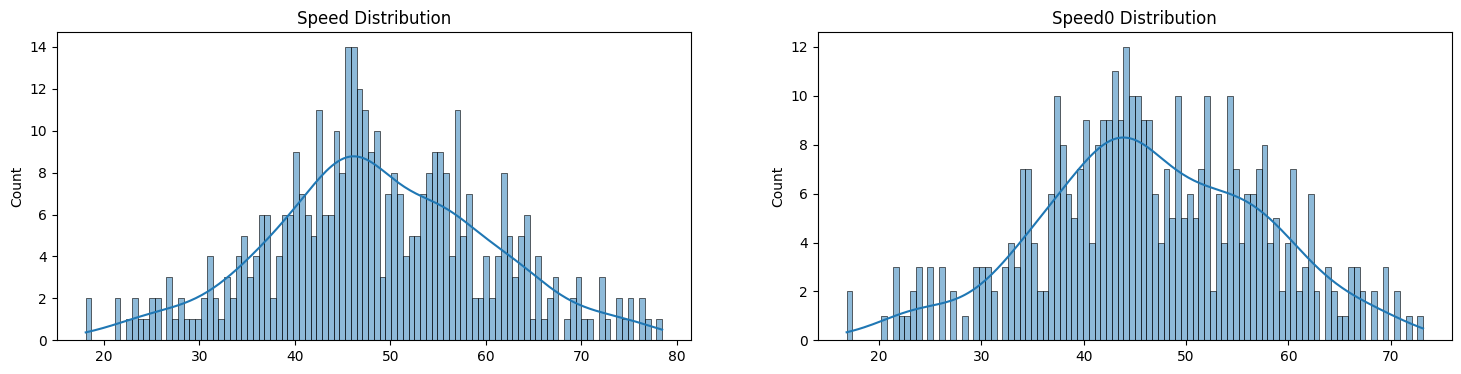

speed 48.64639138860674
speed0 46.41726731013874
ratio 1.0480235956928274
speed std 11.48040396064009
speed0 std 10.838087388540991


In [2]:
import json
from transformers import AutoTokenizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tokenizer=AutoTokenizer.from_pretrained("/home/majunjie/code/weights/hf/Meta-Llama-3.1-8B-Instruct/")
# jsonl_file = "../output/mt_bench/llama3.1/t1d7/pt/hawkeye-33-0.004-1-0.99-speedtest-s100-1.jsonl"
jsonl_file = "../output/mt_bench/llama3.1/t1d7/time/hawkeye-b-0.03084-a-0.02000-g-0.99-lr-1e-04-wd-1e-04-dr-0.20-speedtest-10.jsonl"
jsonl_file_base = "../output/mt_bench/llama3.1/t1d7/time/hawkeye-b-0.03084-a-0.02000-g-0.99-lr-1e-04-wd-1e-04-dr-0.20-speedtest-10-1.jsonl"
data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)



speeds=[]
for datapoint in data[:40]:
    qid=datapoint["question_id"]
    for ch in datapoint["choices"]:
        answer=ch['turns']
        # tokens=sum(ch['new_tokens'])
        # times = sum(ch['wall_time'])
        # speeds.append(tokens/times)
        tokens = 0
        for i in answer:
            tokens += (len(tokenizer(i).input_ids) - 1)
        times = sum(ch['wall_time'])
        speeds.append(tokens / times)
        

data = []
with open(jsonl_file_base, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)


# total_time=0
# total_token=0
speeds0=[]
for datapoint in data[:40]:
    qid=datapoint["question_id"]
    for ch in datapoint["choices"]:
        answer=ch['turns']
        # tokens=sum(ch['new_tokens'])
        # times = sum(ch['wall_time'])
        # speeds0.append(tokens/times)
        tokens = 0
        for i in answer:
            tokens += (len(tokenizer(i).input_ids) - 1)
        times = sum(ch['wall_time'])
        speeds0.append(tokens / times)

#show speed and speed0 's distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(speeds, bins=100, kde=True, ax=axes[0])
axes[0].set_title('Speed Distribution')
sns.histplot(speeds0, bins=100, kde=True, ax=axes[1])
axes[1].set_title('Speed0 Distribution')
plt.show()

print('speed',np.array(speeds).mean())
print('speed0',np.array(speeds0).mean())
print("ratio",np.array(speeds).mean()/np.array(speeds0).mean())

# cal std
print('speed std',np.array(speeds).std())
print('speed0 std',np.array(speeds0).std())



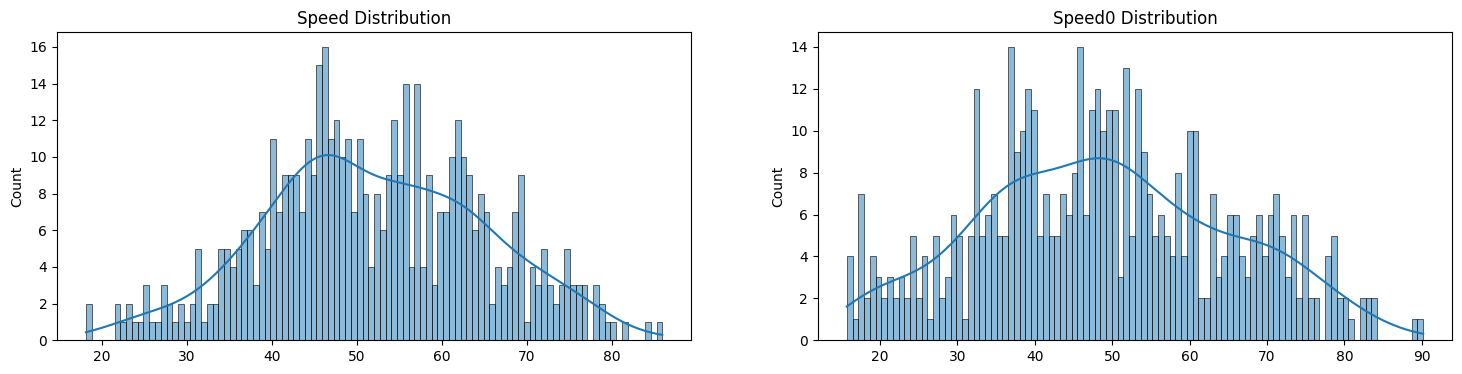

speed 51.96472359910145
speed0 48.79420447514296
ratio 1.0649773709411254
speed std 12.891797607395745
speed0 std 16.109782555132593


In [3]:
import json
from transformers import AutoTokenizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tokenizer=AutoTokenizer.from_pretrained("/home/majunjie/code/weights/hf/Meta-Llama-3.1-8B-Instruct/")
# jsonl_file = "../output/mt_bench/llama3.1/t1d7/pt/hawkeye-33-0.004-1-0.99-speedtest-s100-1.jsonl"
jsonl_file = "../output/mt_bench/llama3.1/t1d7/time/hawkeye-b-0.03084-a-0.02000-g-0.99-lr-1e-04-wd-1e-04-dr-0.20-speedtest-10.jsonl"
jsonl_file_base = "../output/mt_bench/llama3.1/t1d7/time/eagle3-speedtest-10.jsonl"
data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)



speeds=[]
for datapoint in data[:50]:
    qid=datapoint["question_id"]
    for ch in datapoint["choices"]:
        answer=ch['turns']
        # tokens=sum(ch['new_tokens'])
        # times = sum(ch['wall_time'])
        # speeds.append(tokens/times)
        tokens = 0
        for i in answer:
            tokens += (len(tokenizer(i).input_ids) - 1)
        times = sum(ch['wall_time'])
        speeds.append(tokens / times)
        

data = []
with open(jsonl_file_base, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)


# total_time=0
# total_token=0
speeds0=[]
for datapoint in data[:50]:
    qid=datapoint["question_id"]
    for ch in datapoint["choices"]:
        answer=ch['turns']
        # tokens=sum(ch['new_tokens'])
        # times = sum(ch['wall_time'])
        # speeds0.append(tokens/times)
        tokens = 0
        for i in answer:
            tokens += (len(tokenizer(i).input_ids) - 1)
        times = sum(ch['wall_time'])
        speeds0.append(tokens / times)

#show speed and speed0 's distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(speeds, bins=100, kde=True, ax=axes[0])
axes[0].set_title('Speed Distribution')
sns.histplot(speeds0, bins=100, kde=True, ax=axes[1])
axes[1].set_title('Speed0 Distribution')
plt.show()

print('speed',np.array(speeds).mean())
print('speed0',np.array(speeds0).mean())
print("ratio",np.array(speeds).mean()/np.array(speeds0).mean())

# cal std
print('speed std',np.array(speeds).std())
print('speed0 std',np.array(speeds0).std())



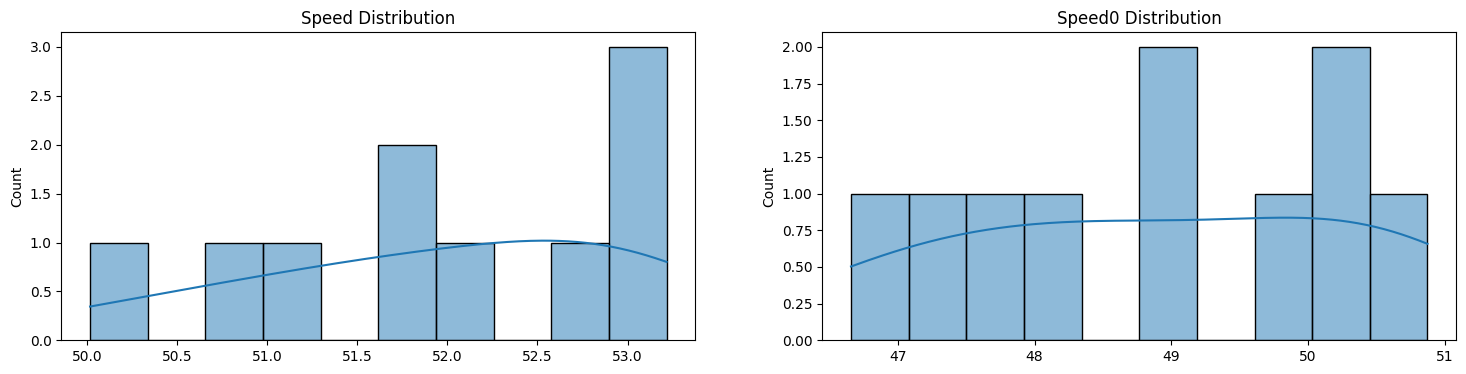

speed 51.96472359910145
speed0 48.91673497472853
ratio 1.062309731545811
avg_speeds [50.0167132484382, 50.8044506176742, 51.14035942976652, 51.70627524517557, 51.928413282675066, 52.166093943835676, 52.838085905487375, 52.911089536525125, 52.9194085409649, 53.216346240471864]
avg_speeds0 [46.65799423290331, 47.14046790706333, 47.69373484392513, 48.19514618014773, 48.87268743414066, 48.877543995966136, 50.010883498175346, 50.404613537584034, 50.441831838882635, 50.872446278496916]
speed std 1.0032731825486159
speed0 std 1.408495687583632


In [1]:
import json
from transformers import AutoTokenizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tokenizer=AutoTokenizer.from_pretrained("/home/majunjie/code/weights/hf/Meta-Llama-3.1-8B-Instruct/")
jsonl_file = "../output/mt_bench/llama3.1/t1d7/time/hawkeye-b-0.03084-a-0.02000-g-0.99-lr-1e-04-wd-1e-04-dr-0.20-speedtest-10.jsonl"
jsonl_file_base = "../output/mt_bench/llama3.1/t1d7/time/eagle3-speedtest-10-1.jsonl"
# jsonl_file_base = "../output/mt_bench/llama3.1/t1d7/time/hawkeye-b-0.03084-a-0.02000-g-0.99-lr-1e-04-wd-1e-04-dr-0.20-speedtest-10-1.jsonl"

data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

avg_speeds = []
for j in range(10):
    speeds=[]
    for datapoint in data[:50]:
        # qid=datapoint["question_id"]
        ch = datapoint["choices"][j]
        answer=ch['turns']
        # tokens=sum(ch['new_tokens'])
        # times = sum(ch['wall_time'])
        # speeds.append(tokens/times)
        tokens = 0
        for i in answer:
            tokens += (len(tokenizer(i).input_ids) - 1)
        times = sum(ch['wall_time'])
        speeds.append(tokens / times)
    avg_speeds.append(np.array(speeds).mean())
        

data = []
with open(jsonl_file_base, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)


avg_speeds0 = []
for j in range(10):
    speeds0=[]
    for datapoint in data[:50]:
        # qid=datapoint["question_id"]
        ch = datapoint["choices"][j]
        answer=ch['turns']
        # tokens=sum(ch['new_tokens'])
        # times = sum(ch['wall_time'])
        # speeds.append(tokens/times)
        tokens = 0
        for i in answer:
            tokens += (len(tokenizer(i).input_ids) - 1)
        times = sum(ch['wall_time'])
        speeds0.append(tokens / times)
    avg_speeds0.append(np.array(speeds0).mean())

#show speed and speed0 's distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(avg_speeds, bins=10, kde=True, ax=axes[0])
axes[0].set_title('Speed Distribution')
sns.histplot(avg_speeds0, bins=10, kde=True, ax=axes[1])
axes[1].set_title('Speed0 Distribution')
plt.show()

print('speed',np.array(avg_speeds).mean())
print('speed0',np.array(avg_speeds0).mean())
print("ratio",np.array(avg_speeds).mean()/np.array(avg_speeds0).mean())
avg_speeds.sort()
print('avg_speeds', avg_speeds)
avg_speeds0.sort()
print('avg_speeds0', avg_speeds0)

# cal std
print('speed std',np.array(avg_speeds).std())
print('speed0 std',np.array(avg_speeds0).std())



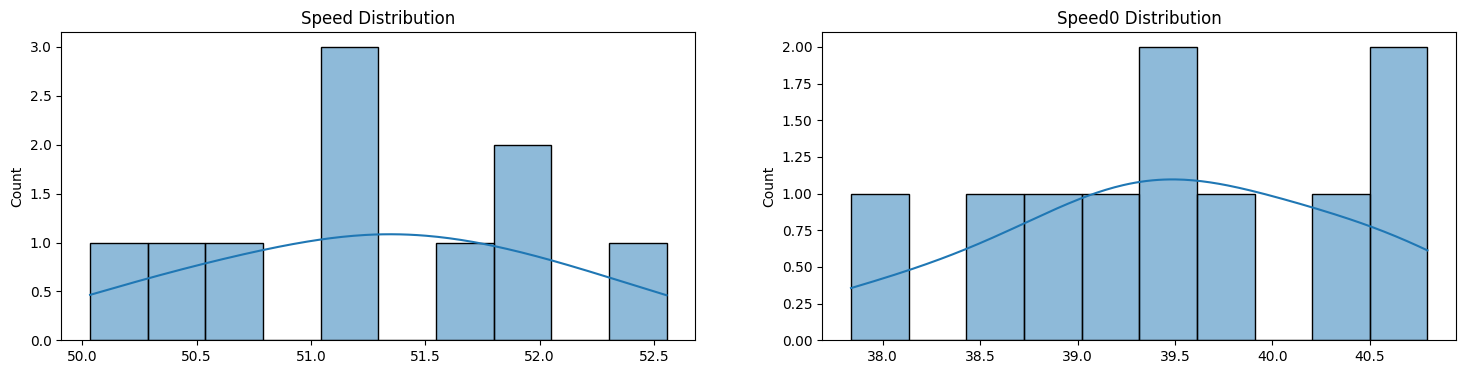

speed 51.29775254136929
speed0 39.49445647886445
ratio 1.2988595644763816
avg_speeds [50.03464151686599, 50.49753347764308, 50.658804708486684, 51.095936040369, 51.274274286526044, 51.292033525840374, 51.60703121157364, 51.92268425252162, 52.040201392577345, 52.55438500128914]
avg_speeds0 [37.837118120177365, 38.511112895979444, 38.98388619254793, 39.20639296389769, 39.51879041927375, 39.52596308572559, 39.69297597521777, 40.340416822241664, 40.53159496687818, 40.79631334670508]
speed std 0.7281426065280509
speed0 std 0.8708920076964359


In [2]:
import json
from transformers import AutoTokenizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tokenizer=AutoTokenizer.from_pretrained("/home/majunjie/code/weights/hf/Meta-Llama-3.1-8B-Instruct/")
jsonl_file = "../output/mt_bench/llama3.1/t1d7/time/hawkeye-b-0.03084-a-0.02000-g-0.99-lr-1e-04-wd-1e-04-dr-0.20-speedtest-10.jsonl"
jsonl_file_base = "../output/mt_bench/llama3.1/t1d7/eagle3-speedtest-10.jsonl"

data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

avg_speeds = []
for j in range(10):
    speeds=[]
    for datapoint in data:
        # qid=datapoint["question_id"]
        ch = datapoint["choices"][j]
        answer=ch['turns']
        # tokens=sum(ch['new_tokens'])
        # times = sum(ch['wall_time'])
        # speeds.append(tokens/times)
        tokens = 0
        for i in answer:
            tokens += (len(tokenizer(i).input_ids) - 1)
        times = sum(ch['wall_time'])
        speeds.append(tokens / times)
    avg_speeds.append(np.array(speeds).mean())
        

data = []
with open(jsonl_file_base, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)


avg_speeds0 = []
for j in range(10):
    speeds0=[]
    for datapoint in data:
        # qid=datapoint["question_id"]
        ch = datapoint["choices"][j]
        answer=ch['turns']
        # tokens=sum(ch['new_tokens'])
        # times = sum(ch['wall_time'])
        # speeds.append(tokens/times)
        tokens = 0
        for i in answer:
            tokens += (len(tokenizer(i).input_ids) - 1)
        times = sum(ch['wall_time'])
        speeds0.append(tokens / times)
    avg_speeds0.append(np.array(speeds0).mean())

#show speed and speed0 's distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(avg_speeds, bins=10, kde=True, ax=axes[0])
axes[0].set_title('Speed Distribution')
sns.histplot(avg_speeds0, bins=10, kde=True, ax=axes[1])
axes[1].set_title('Speed0 Distribution')
plt.show()

print('speed',np.array(avg_speeds).mean())
print('speed0',np.array(avg_speeds0).mean())
print("ratio",np.array(avg_speeds).mean()/np.array(avg_speeds0).mean())
avg_speeds.sort()
print('avg_speeds', avg_speeds)
avg_speeds0.sort()
print('avg_speeds0', avg_speeds0)

# cal std
print('speed std',np.array(avg_speeds).std())
print('speed0 std',np.array(avg_speeds0).std())



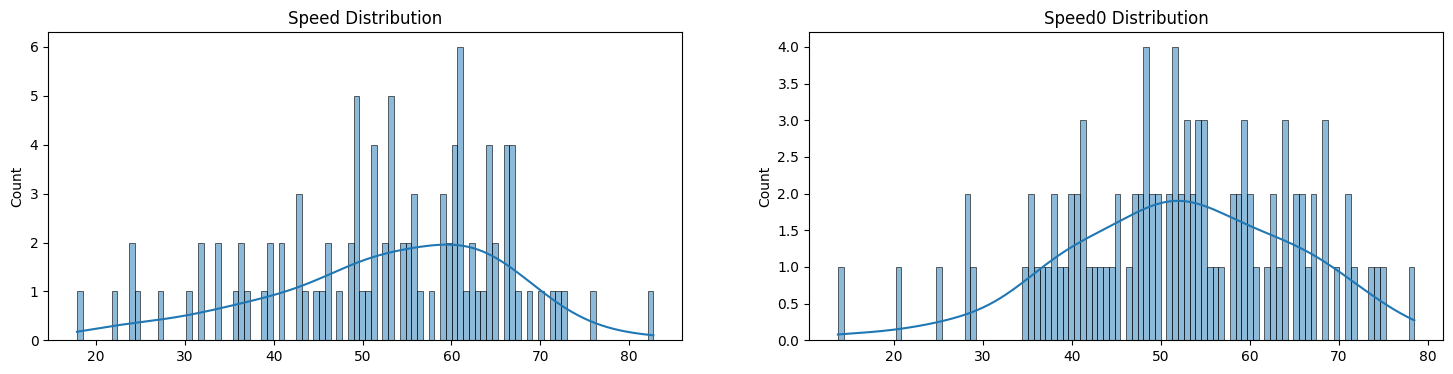

speed 52.86229757533654
speed0 51.926616681874314
ratio 1.0180192924795126
speed std 13.052647522667602
speed0 std 12.667137922773211


In [ ]:
import json
from transformers import AutoTokenizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# tokenizer=AutoTokenizer.from_pretrained("/home/majunjie/code/weights/hf/Meta-Llama-3.1-8B-Instruct/")
# jsonl_file = "/home/majunjie/code/EAGLE/output/mt-bench/llama3.1.jsonl"
# jsonl_file = "/home/majunjie/code/EAGLE/output/mt-bench/llama3.1-d7.jsonl"
# jsonl_file_base = "/home/majunjie/code/EAGLE/output/mt-bench/llama3.1-vanilla.jsonl"
jsonl_file = "../output/shareGPT/llama3.1/t1d7/hawkeye-33-0.004-1-0.99-speedtest-s100.jsonl"
jsonl_file_base = "../output/shareGPT/llama3.1/t1d7/eagle3-speedtest-s100.jsonl"
data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)



speeds=[]
for datapoint in data:
    qid=datapoint["question_id"]
    answer=datapoint["choices"][0]['turns']
    tokens=sum(datapoint["choices"][0]['new_tokens'])
    times = sum(datapoint["choices"][0]['wall_time'])
    speeds.append(tokens/times)


data = []
with open(jsonl_file_base, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)


# total_time=0
# total_token=0
speeds0=[]
for datapoint in data:
    qid=datapoint["question_id"]
    answer=datapoint["choices"][0]['turns']
    tokens=sum(datapoint["choices"][0]['new_tokens'])
    times = sum(datapoint["choices"][0]['wall_time'])
    speeds0.append(tokens/times)
    # qid=datapoint["question_id"]
    # answer=datapoint["choices"][0]['turns']
    # tokens = 0
    # for i in answer:
    #     tokens += (len(tokenizer(i).input_ids) - 1)
    # times = sum(datapoint["choices"][0]['wall_time'])
    # speeds0.append(tokens / times)
    # total_time+=times
    # total_token+=tokens

#show speed and speed0 's distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(speeds, bins=100, kde=True, ax=axes[0])
axes[0].set_title('Speed Distribution')
sns.histplot(speeds0, bins=100, kde=True, ax=axes[1])
axes[1].set_title('Speed0 Distribution')
plt.show()

print('speed',np.array(speeds).mean())
print('speed0',np.array(speeds0).mean())
print("ratio",np.array(speeds).mean()/np.array(speeds0).mean())

# cal std
print('speed std',np.array(speeds).std())
print('speed0 std',np.array(speeds0).std())



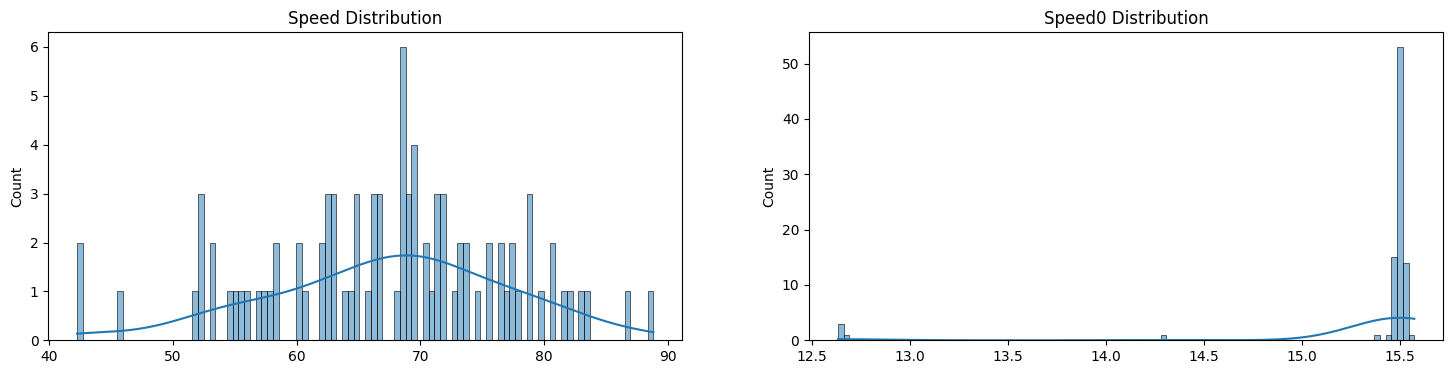

speed 67.44168449467497
speed0 15.359337192044258
ratio 4.390924142846999
speed std 9.548798580078513
speed0 std 0.5971493589785113


In [6]:
import json
from transformers import AutoTokenizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

jsonl_file = "/home/majunjie/code/EAGLE/output/mbpp/llama3.1/t1d7/time/hawkeye-b-0.03084-a-0.02000-g-0.99-lr-1e-04-wd-1e-04-dr-0.10-speedtest-10.jsonl"
jsonl_file_base = "/home/majunjie/code/EAGLE/output/mbpp/llama3.1/t1d7/time/baseline-speedtest-3.jsonl"
data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)


ci = 2
speeds=[]
for datapoint in data:
    qid=datapoint["question_id"]
    answer=datapoint["choices"][ci]['turns']
    tokens=sum(datapoint["choices"][ci]['new_tokens'])
    times = sum(datapoint["choices"][ci]['wall_time'])
    speeds.append(tokens/times)


data = []
with open(jsonl_file_base, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)


# total_time=0
# total_token=0
speeds0=[]
for datapoint in data:
    qid=datapoint["question_id"]
    answer=datapoint["choices"][0]['turns']
    tokens=sum(datapoint["choices"][0]['new_tokens'])
    times = sum(datapoint["choices"][0]['wall_time'])
    speeds0.append(tokens/times)
    # qid=datapoint["question_id"]
    # answer=datapoint["choices"][0]['turns']
    # tokens = 0
    # for i in answer:
    #     tokens += (len(tokenizer(i).input_ids) - 1)
    # times = sum(datapoint["choices"][0]['wall_time'])
    # speeds0.append(tokens / times)
    # total_time+=times
    # total_token+=tokens

#show speed and speed0 's distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(speeds, bins=100, kde=True, ax=axes[0])
axes[0].set_title('Speed Distribution')
sns.histplot(speeds0, bins=100, kde=True, ax=axes[1])
axes[1].set_title('Speed0 Distribution')
plt.show()

print('speed',np.array(speeds).mean())
print('speed0',np.array(speeds0).mean())
print("ratio",np.array(speeds).mean()/np.array(speeds0).mean())

# cal std
print('speed std',np.array(speeds).std())
print('speed0 std',np.array(speeds0).std())



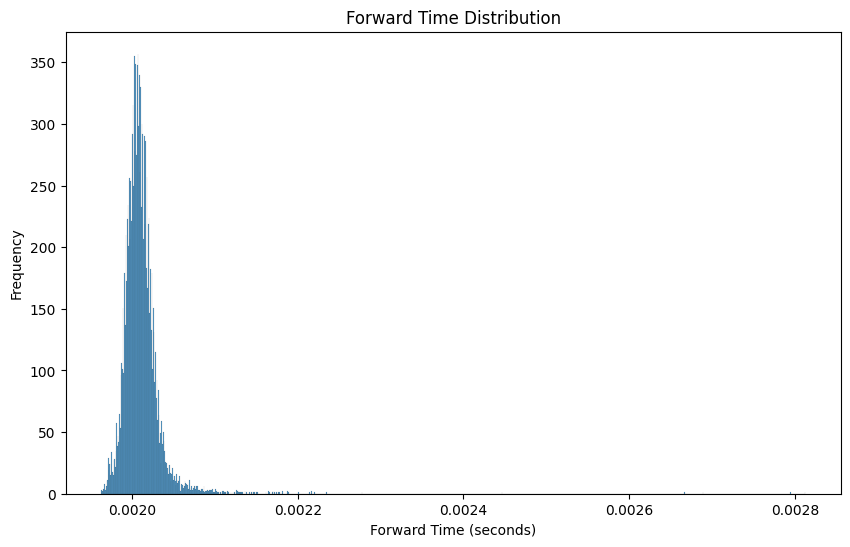

Forward time mean: 0.002010541945108639
Forward time std: 2.394567712875313e-05
Forward time max: 0.0028128623962402344
Forward time min: 0.001962423324584961
Forward time median: 0.0020079612731933594


In [2]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

jsonl_file = "../output/shareGPT/llama3.1/t1d7/eagle3-forward-time.jsonl"
data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

forward_times = []
for datapoint in data:
    for tl in datapoint["choices"]:
        forward_times.extend(tl)

plt.figure(figsize=(10, 6))
plt.title("Forward Time Distribution")
plt.xlabel("Forward Time (seconds)")
plt.ylabel("Frequency")
sns.histplot(forward_times, bins=1000)

plt.show()

print("Forward time mean:", np.mean(forward_times))
print("Forward time std:", np.std(forward_times))
print("Forward time max:", np.max(forward_times))
print("Forward time min:", np.min(forward_times))
print("Forward time median:", np.median(forward_times))
    

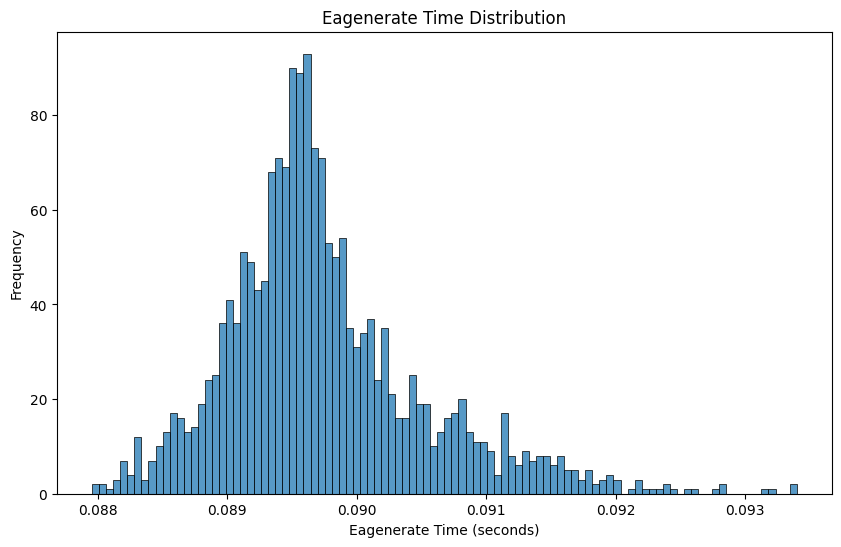

Eagenerate time mean: 0.08974500562111017
Eagenerate time std: 0.0007746877168179826
Eagenerate time max: 0.09339761734008789
Eagenerate time min: 0.08795738220214844
Eagenerate time median: 0.0896143913269043


In [5]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

jsonl_file = "../output/shareGPT/llama3.1/t1d7/eagle3-eagen-time.jsonl"
data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

eagenerate_time = []
for datapoint in data:
    eagenerate_time.extend(datapoint["choices"])

plt.figure(figsize=(10, 6))
plt.title("Eagenerate Time Distribution")
plt.xlabel("Eagenerate Time (seconds)")
plt.ylabel("Frequency")
sns.histplot(eagenerate_time, bins=100)

plt.show()

print("Eagenerate time mean:", np.mean(eagenerate_time))
print("Eagenerate time std:", np.std(eagenerate_time))
print("Eagenerate time max:", np.max(eagenerate_time))
print("Eagenerate time min:", np.min(eagenerate_time))
print("Eagenerate time median:", np.median(eagenerate_time))
    

In [6]:
public_time = np.mean(eagenerate_time) - 7 * np.mean(forward_times)
single_forward_time = np.mean(forward_times)

In [7]:
public_time

0.0756712120053497

In [8]:
single_forward_time

0.002010541945108639

In [9]:
public_time / single_forward_time

37.637221242484856

In [ ]:
import json
import os
import glob
from transformers import AutoTokenizer
import numpy as np
import pandas as pd

# ==============================================================================
# 请在此处配置您的测试参数
# ==============================================================================

# 1. 定义模型和路径配置
#    - model_name: 用于构建文件路径
#    - tokenizer_path: 每个模型对应的分词器路径
#    - pt_list: 每个模型对应的 .pt 文件列表 (仅用于查找 hawkeye 文件)
MODELS_CONFIG = [
    {
        "model_name": "llama3.1",
        "tokenizer_path": "/home/majunjie/code/weights/hf/Meta-Llama-3.1-8B-Instruct/",
        "pt_list": [
            "b-0.03084-a-0.02000-g-0.99-lr-1e-04-wd-1e-04-dr-0.20.pt",
            "b-0.03084-a-0.02000-g-0.99-lr-1e-04-wd-1e-04-dr-0.10.pt"
        ],
    },
    # {
    #     "model_name": "vicuna13",
    #     "tokenizer_path": "/home/majunjie/code/weights/hf/vicuna-13b-v1.3/",
    #     "pt_list": [
    #         "vicuna_pt_file_1.pt",
    #     ],
    # },
    # {
    #     "model_name": "deepseek",
    #     "tokenizer_path": "path/to/deepseek/tokenizer",
    #     "pt_list": ["ds_pt_file_1.pt"],
    # },
]

# 2. 定义要分析的基准测试和 num_choices
BENCH_LIST = [
    "mt_bench",
    "humaneval",
    "gsm8k",
    "alpaca",
    "mbpp"
]
NUM_CHOICES_LIST = [10]

# 3. 定义结果文件的根目录
OUTPUT_DIR_PREFIX = "../output"

# 4. 定义处理的数据点数量
NUM_DATAPOINTS = 50

# ==============================================================================
# 脚本核心逻辑
# ==============================================================================

def calculate_average_speed(jsonl_file, tokenizer, num_choices, num_datapoints):
    """
    从指定的jsonl文件中计算平均解码速度。

    Args:
        jsonl_file (str): 输入的jsonl文件路径。
        tokenizer: 已加载的 Transformers tokenizer。
        num_choices (int): 文件中每个问题包含的choices数量。
        num_datapoints (int): 用于计算的样本数量。

    Returns:
        tuple: (平均速度, 速度的标准差)，如果文件不存在或为空则返回 (None, None)。
    """
    if not os.path.exists(jsonl_file):
        # print(f"Warning: File not found, skipping: {jsonl_file}")
        return None, None

    data = []
    with open(jsonl_file, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line))

    if not data:
        print(f"Warning: File is empty, skipping: {jsonl_file}")
        return None, None

    avg_speeds_per_choice = []
    for j in range(num_choices):
        speeds_for_this_choice = []
        # 确保使用的数据点不超过文件中的实际数量
        for datapoint in data[:min(num_datapoints, len(data))]:
            if j >= len(datapoint["choices"]):
                continue # 如果某个数据点的choices数量不足，则跳过
            
            choice = datapoint["choices"][j]
            answer_turns = choice['turns']
            wall_time = sum(choice['wall_time'])
            
            if wall_time == 0:
                continue

            total_tokens = 0
            for turn in answer_turns:
                # 减1是为了排除分词后自动添加的起始符 (BOS token)
                total_tokens += (len(tokenizer(turn).input_ids) - 1)
            
            speeds_for_this_choice.append(total_tokens / wall_time)
        
        if speeds_for_this_choice:
            avg_speeds_per_choice.append(np.mean(speeds_for_this_choice))

    if not avg_speeds_per_choice:
        return None, None
        
    final_avg_speed = np.mean(avg_speeds_per_choice)
    final_std_dev = np.std(avg_speeds_per_choice)
    
    return final_avg_speed, final_std_dev


def main():
    """主函数，遍历所有配置并计算速度"""
    results = []

    for model_config in MODELS_CONFIG:
        model_name = model_config["model_name"]
        print(f"\n{'='*30}\nProcessing Model: {model_name}\n{'='*30}")
        
        try:
            tokenizer = AutoTokenizer.from_pretrained(model_config["tokenizer_path"])
        except Exception as e:
            print(f"Error loading tokenizer for {model_name} from {model_config['tokenizer_path']}. Skipping. Error: {e}")
            continue

        for bench_name in BENCH_LIST:
            for num_choices in NUM_CHOICES_LIST:
                base_path = f"{OUTPUT_DIR_PREFIX}/{bench_name}/{model_name}/t1d7/time"

                # 1. 计算 Baseline (原生模型) 的速度作为基准
                baseline_file = f"{base_path}/baseline-speedtest-{num_choices}.jsonl"
                baseline_speed, _ = calculate_average_speed(baseline_file, tokenizer, num_choices, NUM_DATAPOINTS)
                
                # 2. 计算 Eagle (EA) 的速度并对比
                eagle_file = f"{base_path}/eagle3-speedtest-{num_choices}.jsonl"
                eagle_speed, eagle_std = calculate_average_speed(eagle_file, tokenizer, num_choices, NUM_DATAPOINTS)
                if eagle_speed is not None:
                    ratio = (eagle_speed / baseline_speed) if baseline_speed else 0
                    results.append({
                        "Model": model_name,
                        "Benchmark": bench_name,
                        "Choices": num_choices,
                        "Type": "Eagle (EA)",
                        "Speed": f"{eagle_speed:.2f}",
                        "Baseline Speed": f"{baseline_speed:.2f}" if baseline_speed is not None else "N/A",
                        "Speedup": f"{ratio:.2f}x",
                        "Std Dev": f"{eagle_std:.2f}"
                    })
                
                # 3. 计算 Hawkeye (EA-WE) 的速度并对比
                for pt_file in model_config["pt_list"]:
                    pt_name = pt_file.replace('.pt', '')
                    hawkeye_file = f"{base_path}/hawkeye-{pt_name}-speedtest-{num_choices}.jsonl"
                    hawkeye_speed, hawkeye_std = calculate_average_speed(hawkeye_file, tokenizer, num_choices, NUM_DATAPOINTS)
                    if hawkeye_speed is not None:
                        ratio = (hawkeye_speed / baseline_speed) if baseline_speed else 0
                        results.append({
                            "Model": model_name,
                            "Benchmark": bench_name,
                            "Choices": num_choices,
                            "Type": f"Hawkeye ({pt_name[:15]}...)", # 缩短pt文件名以适应表格
                            "Speed": f"{hawkeye_speed:.2f}",
                            "Baseline Speed": f"{baseline_speed:.2f}" if baseline_speed is not None else "N/A",
                            "Speedup": f"{ratio:.2f}x",
                            "Std Dev": f"{hawkeye_std:.2f}"
                        })

    # 使用 Pandas DataFrame 格式化并打印结果
    if results:
        df = pd.DataFrame(results)
        df.set_index(["Model", "Benchmark", "Choices", "Type"], inplace=True)
        print("\n" + "="*80)
        print(" " * 25 + "Decoding Speed Comparison")
        print("="*80)
        print(df)
        print("="*80)
    else:
        print("\nNo results to display. Please check your configuration and file paths.")


if __name__ == "__main__":
    main()

: 